
<h3 style="color: #001a79;">Exercise 1.1</h3>

<hr style="border-top: 1px solid #001a79;" />


The above gives about a 1.5% chance of randomly selecting the correct cups. Calculate the minimum number of cups of tea required to ensure the probability of randomly selecting the correct cups is less than or equal to 1%.

*Bonus:* How many would be required if you were to let the taster get one cup wrong while maintaining the 1% threshold?


 Following adapted from this link : https://stackoverflow.com/a/4941932

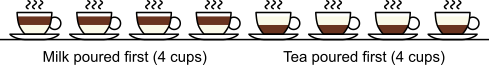 <br> <i><p style='text-align: center;'> Adapted from Reference 1 </p></i>


In [2]:
# Math module import
import math

In [3]:
# Number of ways of selecting 4 cups from 8
math.comb(8,4)


70

Should the subject pick the correct four cups with milk in them first, there is only a 1 in 70 (~1.4%) chance of them having done that if they were simply guessing.

In [4]:
# Number of ways of selecting 5 cups from 10
math.comb(10,5)

252

Should the subject pick the correct five cups with milk in them first, there is only a 1 in 252 (~0.39%) chance of them having done that if they were simply guessing.

In [5]:
# Probability of randomly selecting 5 cups is:
1.0 / math.comb(10,5)

0.003968253968253968

So, if experiment was done with 10 cups total, and 5 with milk in first and 5 with tea in first then the chance of selecting correctly randomly is much less.

Of course, we could design the experiment to have 9 cups total, with 4 'milk-in-first' and 5 'tea-in-first' - or vice versa. 

In [11]:
# Number of ways of selecting 4 cups from 9
math.comb(9,4)

126

In [6]:
# Probability of randomly selecting 4 cups is:
1.0 / math.comb(9,5)

0.007936507936507936

This is less than 1%, as is the previous calculation. 

In [14]:
# Note the number of ways of selecting 5 cups from 9:
math.comb(9,5)

126

<h4>References for this exercise</h4>

[1] https://brainder.org/2015/08/23/the-lady-tasting-tea-and-fishers-exact-test/#:~:text=The%20probability%20can%20be%20calculated%20as%3A&text=Thus%2C%20if%20the%20lady%20is,%2C%20i.e.%2C%20about%2024%25.
[2] https://www.oreilly.com/library/view/classic-problems-of/9781118314333/chapter26.html

*Bonus:* How many would be required if you were to let the taster get one cup wrong while maintaining the 1% threshold?

    

In [9]:
# Allowing the chooser to get one cup wrong.
math.comb(10,4)
     

210

In [10]:
1 / math.comb(10,4)

0.004761904761904762

<h3 style="color: #001a79;">Exercise 1.2</h3>

<hr style="border-top: 1px solid #001a79;" />


Use <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html" style="color: #ff791e">scipy's version of Fisher's exact test</a> to simulate the Lady Tasting Tea problem.

In [11]:
# Statistical import
import scipy.stats as ss
import numpy as np

In [12]:
ss.fisher_exact

<function scipy.stats.stats.fisher_exact(table, alternative='two-sided')>

Fisher postulated the use of the exact test as the p-value could be determined directly. [2, 3]

In [17]:
# oddsratio, pvalue =ss.fisher_exact([[4, 0], [0, 4]])
# The one-sided p-value for alternative='greater' is the probability that a random table has x >= a,
table = np.array([[4, 0], [0, 4]])
oddsr, p = ss.fisher_exact(table, alternative='greater')
p


0.014285714285714268

Target: 0.014285714285714285


In [18]:
# multiply target by 2 
0.014285714285714285 *2

0.02857142857142857

<h4>References for this exercise</h4>


[1] https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html

[2] https://www.cs.utah.edu/~jeffp/teaching/cs3130/lectures/L15-HypothesisTests1.pdf

[3] https://towardsdatascience.com/fishers-exact-test-from-scratch-with-python-2b907f29e593

<h3 style="color: #001a79;">Exercise 2.1</h3>

<hr style="border-top: 1px solid #001a79;" />

Add info for the following: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

T-test: This is a test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default [1].
The t-test can be used, for example, to determine if the means of two sets of data are significantly different from each other.
A null hypothesis is a type of statistical hypothesis that proposes that no statistical significance exists in a set of given observations[2].
A p-value larger than a chosen threshold (e.g. 5% or 1%) indicates that our observation is not so unlikely to have occurred by chance.
A p-value less than 0.05 (typically ≤ 0.05) is statistically significant.

In [21]:
from scipy import stats
import numpy as np

# lets generate some 'random' numbers
rng = np.random.default_rng()

Testing samples with the exact same means. We would expect to see here identical averages (naturally). 

In [92]:
rvs1 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng) # loc = mean in the normal distribution , scale = standard deviation , and using random number generator
rvs2 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng) # rng = peseudo-random number generator. Basically not exactly random 
a = stats.ttest_ind(rvs1, rvs2)
b = stats.ttest_ind(rvs1, rvs2, equal_var=False) # perform a standard independent 2 sample test that assumes equal population variances. If False, perform Welch’s t-test, which does not assume equal population variance

# let's get the means
avg_a = np.mean(rvs1)
avg_b = np.mean(rvs2)

print("Results of t-test: {a}. Mean of the sample is {avg_a}".format(a = a,avg_a = avg_a)) # print out variable a
print("Results of t-test: {b}. Mean of the sample is {avg_b}".format(b = b ,avg_b = avg_b)) # print out variable b



Results of t-test: Ttest_indResult(statistic=0.6720709664250635, pvalue=0.5016940703406533). Mean of the sample is 5.092397501475184
Results of t-test: Ttest_indResult(statistic=0.6720709664250635, pvalue=0.5016940764948229). Mean of the sample is 4.682450834927122


A larger t-value shows that the difference between group means is greater than the pooled standard error, indicating a more significant difference between the groups [3]. Note that it’s negative; this is fine! In most cases, we only care about the absolute value of the difference, or the distance from 0. It doesn’t matter which direction.

ttest_ind underestimates p for unequal variances:
<i>The unequal variance t-test is an independent t-test and is used when the number of samples in each group is different, and the variance of the two data sets is also different. This test is also called Welch's t-test.</i> [1]

In [97]:
# Introducing Welch's test
rvs3 = stats.norm.rvs(loc=5, scale=20, size=500, random_state=rng)
c = stats.ttest_ind(rvs1, rvs3)
d = stats.ttest_ind(rvs1, rvs3, equal_var=False)
print(c)
print(d)

Ttest_indResult(statistic=1.0447750826500468, pvalue=0.2963799227279646)
Ttest_indResult(statistic=1.0447750826500468, pvalue=0.29647493117389434)


When n1 != n2 (size of the sample set), the equal variance t-statistic is no longer equal to the unequal variance t-statistic:



In [98]:
rvs4 = stats.norm.rvs(loc=5, scale=20, size=100, random_state=rng) # size of rsv4 is 1/5 that of previously declared variables
e = stats.ttest_ind(rvs1, rvs4)
print(e)
print("Difference between sample sizes is {l}".format(l = len(rvs1) - len(rvs4)))

Ttest_indResult(statistic=2.4487909811108417, pvalue=0.014619704696956191)
Difference between sample sizes is 400


Now setting equal variance to False

In [38]:
stats.ttest_ind(rvs1, rvs4, equal_var=False)


Ttest_indResult(statistic=-0.04119050517319149, pvalue=0.9672199376287933)

T-test with different means, variance, and n:



In [39]:
rvs5 = stats.norm.rvs(loc=8, scale=20, size=100, random_state=rng)
stats.ttest_ind(rvs1, rvs5)

Ttest_indResult(statistic=-3.0685960732387976, pvalue=0.002248037491864249)

Now setting equal variance to False

In [40]:
stats.ttest_ind(rvs1, rvs5, equal_var=False)

Ttest_indResult(statistic=-1.993905275377855, pvalue=0.04866344805155035)

When performing a permutation test, more permutations typically yields more accurate results.

In [58]:
e = stats.ttest_ind(rvs1, rvs5, permutations=100, random_state=rng)
f = stats.ttest_ind(rvs1, rvs5, permutations=1000, random_state=rng)
print(e)
print(f)


Ttest_indResult(statistic=-3.0685960732387976, pvalue=0.0)
Ttest_indResult(statistic=-3.0685960732387976, pvalue=0.001)


In [59]:
g = stats.ttest_ind(rvs1, rvs5, permutations=10000, random_state=rng)
h = stats.ttest_ind(rvs1, rvs5, permutations=20000, random_state=rng)
print(g)
print(h)

Ttest_indResult(statistic=-3.0685960732387976, pvalue=0.0034)
Ttest_indResult(statistic=-3.0685960732387976, pvalue=0.00235)


In [61]:
#Take these two samples, one of which has an extreme tail.

a = (56, 128.6, 12, 123.8, 64.34, 78, 763.3)
b = (1.1, 2.9, 4.2)

Use the trim keyword to perform a trimmed (Yuen) t-test. For example, using 20% trimming, trim=.2, the test will reduce the impact of one (np.floor(trim *len(a))) element from each tail of sample a. It will have no effect on sample b because np.floor(trim*len(b)) is 0.

In [62]:
stats.ttest_ind(a, b, trim=.2)

Ttest_indResult(statistic=3.4463884028073513, pvalue=0.01369338726499547)

<h4>References for this exercise</h4>

[1] https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

[2] https://www.sciencedirect.com/topics/earth-and-planetary-sciences/null-hypothesis

[3] https://www.scribbr.com/statistics/t-test/

[4] https://analyticsindiamag.com/a-beginners-guide-to-students-t-test-in-python-from-scratch%EF%BF%BC/